# Simple linear regression from scratch

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [2]:
x,y = make_regression(n_samples=100,n_features=1,noise=10)

y = np.reshape(y,(len(y),1))
y.ndim

2

Text(0.5, 1.0, 'Test dataset')

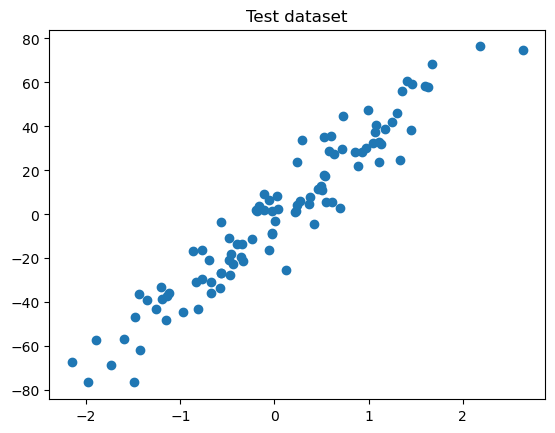

In [44]:
plt.scatter(x,y)
plt.title("Test dataset")

In [4]:
# Vecteurs et modèle

theta = np.random.randn(2,1)
X = np.hstack((x,np.ones(x.shape)))

def model(X,theta):
    return X.dot(theta)

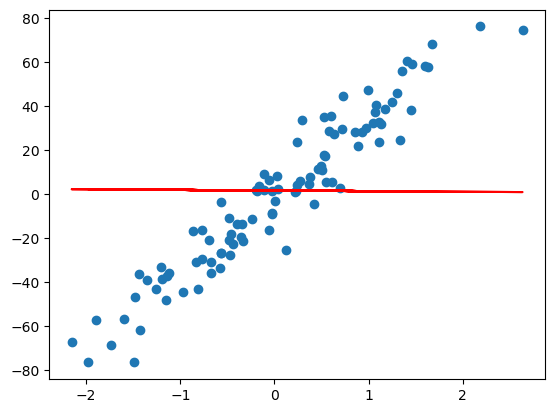

In [5]:
plt.scatter(x,y)
plt.plot(x,model(X,theta),c='r')

In [6]:
# Cost function : mean squared error

m = len(y)

def cost_function(X,theta,y):
    return (1/(2*m))*np.sum((model(X,theta)-y)**2)

cost_function(X,theta,y) # Cout très elevé car les paramètres du modèle ont été initialisé aléatoirement

631.8230135579295

In [7]:
# Calcul des gradients

def gradient(X,theta,y):
    return 1/m * X.T.dot(model(X,theta)-y)

gradient(X,theta,y).shape

(2, 1)

In [45]:
# Descente de gradient

def gradient_descent(X,y, theta, gradient, learning_rate=0.1, n_iter=50):
    cost_function_history = []
    for i in range(n_iter):
        theta = theta - learning_rate*gradient(X,theta,y)
        cost_function_history.append(cost_function(X,theta,y))
    
    plt.plot(range(n_iter),cost_function_history)
    plt.title("Loss function history")
    plt.show()
    return theta # on retourne les bons paramètres du modèle

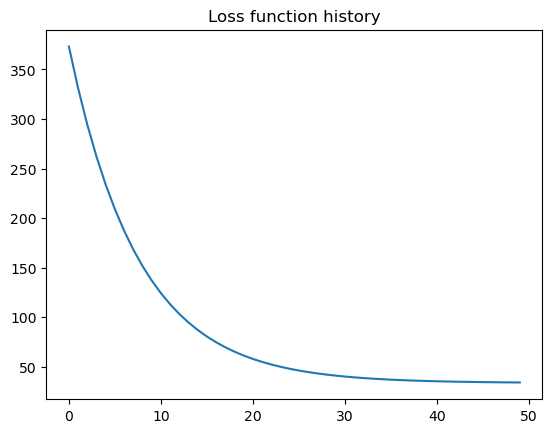

array([[33.15944204],
       [-0.93562127]])

In [46]:
gradient_descent(X,y,theta,gradient) # apprentissage

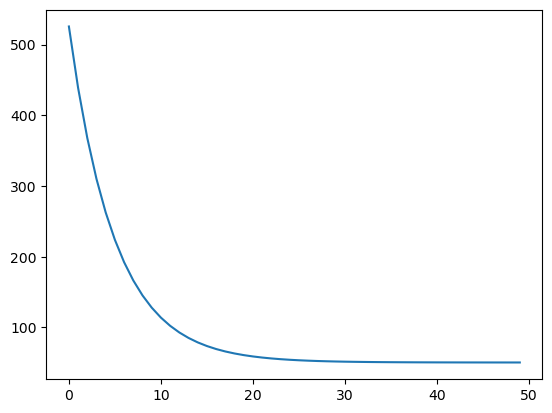

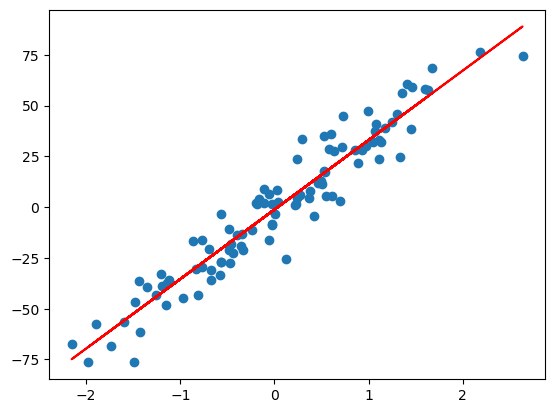

In [10]:
theta_final = gradient_descent(X,y,theta,gradient)
predictions = model(X,theta_final)

plt.scatter(x,y)
plt.plot(x,predictions,c="r")

In [11]:
model(np.array([2,1]),theta_final)

array([67.2596918])

# Application : Analyse du dataset Iris

In [12]:
from sklearn import datasets
import pandas as pd

# load iris dataset
iris = datasets.load_iris()
# Since this is a bunch, create a dataframe
iris_df=pd.DataFrame(iris.data)
iris_df['class']=iris.target

iris_df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
iris_df.dropna(how="all", inplace=True) # remove any empty lines


In [13]:
iris_df

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [14]:
iris_df.corr() # recherche des variables linéairement correllées

,sepal_len,sepal_wid,petal_len,petal_wid,class
sepal_len,1.000000,-0.117570,0.871754,0.817941,0.782561
sepal_wid,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal_len,0.871754,-0.428440,1.000000,0.962865,0.949035
petal_wid,0.817941,-0.366126,0.962865,1.000000,0.956547
class,0.782561,-0.426658,0.949035,0.956547,1.000000


In [15]:
# petal_wid and petal_len

petal_wid = iris_df["petal_wid"]
petal_wid

0      0.2
1      0.2
2      0.2
3      0.2
4      0.2
      ... 
145    2.3
146    1.9
147    2.0
148    2.3
149    1.8
Name: petal_wid, Length: 150, dtype: float64

In [16]:
petal_len = iris_df["petal_len"]
petal_len

0      1.4
1      1.4
2      1.3
3      1.5
4      1.4
      ... 
145    5.2
146    5.0
147    5.2
148    5.4
149    5.1
Name: petal_len, Length: 150, dtype: float64

In [17]:
petal_len.corr(petal_wid) # Coefficient de corrélation linéaire très élevé

0.9628654314027962

Les deux variables ont une relation linéaire

Text(0, 0.5, 'Largeur du petal')

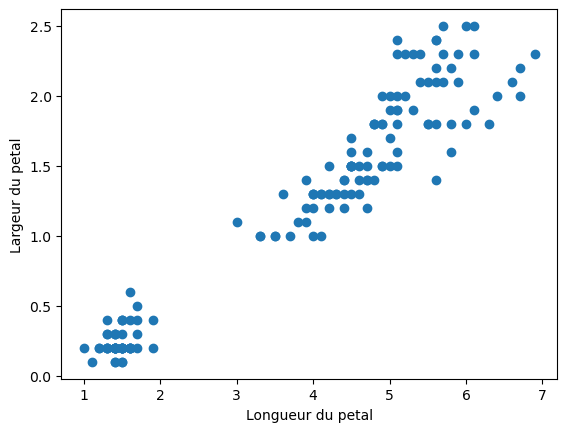

In [18]:
plt.scatter(petal_len,petal_wid)
plt.xlabel("Longueur du petal")
plt.ylabel("Largeur du petal")

In [19]:
petal_len.shape
petal_len = np.array(petal_len)
petal_len = petal_len.reshape(len(petal_len),1)

In [20]:
petal_wid = np.array(petal_wid)
petal_wid = petal_wid.reshape(len(petal_wid),1)
petal_wid.shape

(150, 1)

In [21]:
X2 = np.hstack((petal_len,np.ones(petal_len.shape)))
y2 = petal_wid

In [22]:
print(X2.shape)
print(y2.shape)

(150, 2)
(150, 1)


In [23]:
# Création du modèle

features = 1
theta2 = np.random.randn((features+1),1)

def model2(X2,theta2):
    return X2.dot(theta2)

In [24]:
# Fonction coût
m = len(petal_len)
def cost_function2(X2,theta2,y2):
    return (1/(2*m)) * np.sum((model(X2,theta2)-y2)**2)
cost_function2(X2,theta2,y2)

19.834083713493623

In [25]:
def gradients(X2,theta2,y2):
    return 1/m * X2.T.dot(model(X2,theta2) - y2)

In [49]:
def gradient_descent2(X2,theta2,y2,learning_rate=0.1, n_iter=100):
    
    cost_history = []
    for i in range(n_iter):
        theta2 = theta2 - learning_rate * gradients(X2,theta2,y2)
        cost_history.append(cost_function2(X2,theta2,y2))
    
    plt.plot(range(n_iter),cost_history)
    plt.title("Courbe d'apprentissage")
    plt.show()
    return theta2

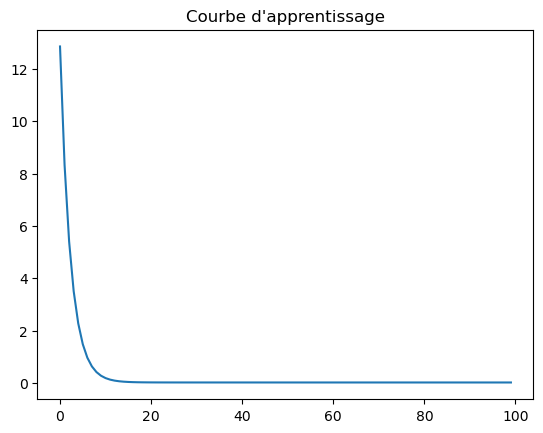

In [50]:
theta_final2 = gradient_descent2(X2,theta2,y2)

In [51]:
theta_final2

array([[ 0.42117709],
       [-0.38766857]])

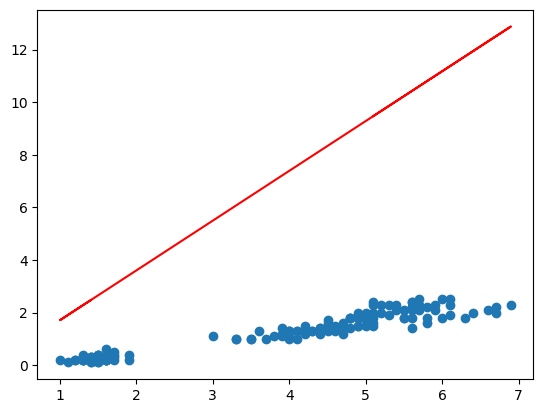

In [52]:
plt.scatter(petal_len,y2)
plt.plot(petal_len,model2(X2,theta2),color='r')

Text(0, 0.5, 'Largeur du petal')

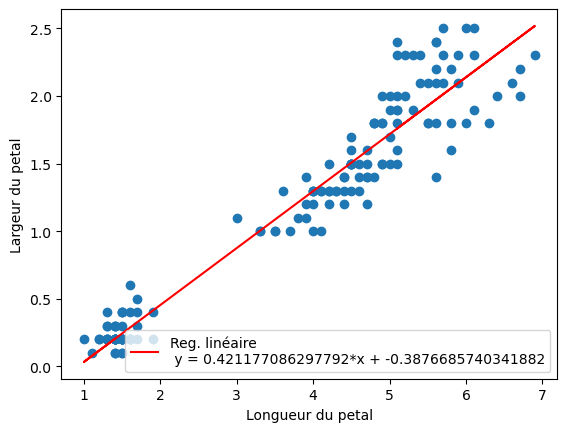

In [57]:
predict = model2(X2,theta_final2)
plt.scatter(petal_len,y2)
plt.plot(petal_len,predict,color='r',label=f"Reg. linéaire \n y = {float(theta_final2[0])}*x + {float(theta_final2[1])}")
plt.legend()
plt.xlabel("Longueur du petal")
plt.ylabel("Largeur du petal")

Si le petal à une longueur de 5cm, quelle est sa largeur ?

In [31]:
largeur_petal = np.array([5,1])

largeur_prediction = model2(largeur_petal,theta_final2)
print("Si le pétal à une longueur de 5cm, alors sa largeur sera de : ", float(largeur_prediction), "cm")

Si le pétal à une longueur de 5cm, alors sa largeur sera de :  1.715783106104546 cm


In [32]:
theta_final2

array([[ 0.41593119],
       [-0.36387283]])

In [33]:
largeur_petal = np.array([5,1])
largeur_petal

array([5, 1])

In [34]:
# With scikit-learn

from sklearn.linear_model import LinearRegression

In [35]:
sk_model = LinearRegression()

In [36]:
sk_model.fit(petal_len,petal_wid)

LinearRegression()

In [37]:
sk_model.score(petal_len,petal_wid) #r2 

0.9271098389904927

In [58]:
# Coefficient de détermination pour la méthode from scratch

r = iris_df["petal_len"].corr(iris_df["petal_wid"])
r2 = r**2
print(r2)

0.9271098389904929


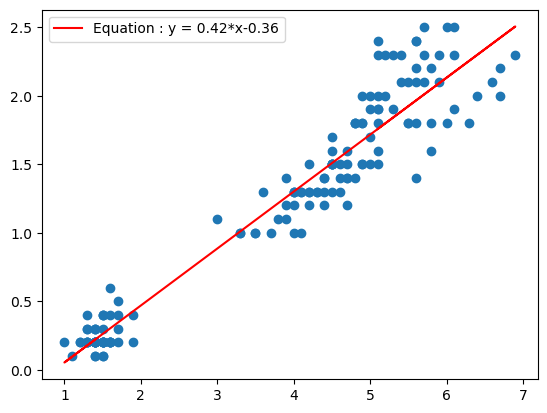

In [39]:
# Variable explicative = petal_len
# Variable à expliquer = petal_wid

plt.scatter(petal_len,petal_wid)
plt.plot(petal_len, sk_model.predict(petal_len),color="red",label="Equation : y = 0.42*x-0.36")
plt.legend()

In [40]:
sk_model.intercept_

array([-0.36307552])

In [41]:
sk_model.coef_

array([[0.41575542]])